## **IMPORTANT**

### Install these libraries before trying out the Classifier

In [ ]:
!pip install joblib
!pip install transformers
!pip install torch

## Import necessary libraries

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import torch
from transformers import BertTokenizer, BertModel

## Load the existing models

### 1: Loads pre-trained BERT tokenizer and model
### 2: Loads pre-trained Support Vector Classification (SVC) model


In [41]:
# Load the BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('./models/saved_bert_model')
model = BertModel.from_pretrained('./models/saved_bert_model')

svcModel = joblib.load('svc_model.joblib')

## Converts input text into a numeric representation based on trained BERT model

* Uses tokenizer to convert the input texts into token IDs with padding and truncation to have uniform input size.

* Then it passes the tokenized inputs to the model to get BERT's output embeddings.

* Then it calculates the mean of the last hidden state across tokens for each input text to get a fixed-size representation, and converts the result to a NumPy array.

In [44]:
# Define function to get BERT embeddings
def get_bert_embeddings(texts):
    inputs = tokenizer(texts, return_tensors='pt', padding=True, truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).cpu().numpy()

# **<b>TEST MODEL HERE</b>**

In [50]:
# Function to predict ambiguity
def predict_ambiguity(user_stories):
    X_new = get_bert_embeddings(user_stories)
    predictions = svcModel.predict(X_new)
    return predictions

# CLI input and prediction
print("Enter user stories (type 'done' when finished):")
user_stories = []
while True:
    story = input("User Story: ")
    if story.lower() == 'done':
        break
    user_stories.append(story)

predictions = predict_ambiguity(user_stories)
for story, prediction in zip(user_stories, predictions):
    print(f"User Story: {story}\nPrediction: {prediction}\n")

Enter user stories (type 'done' when finished):


User Story:  lol
User Story:  done


User Story: lol
Prediction: 0



## <b>See how many times the model predicted ambiguity in data (1700+ records)</b>

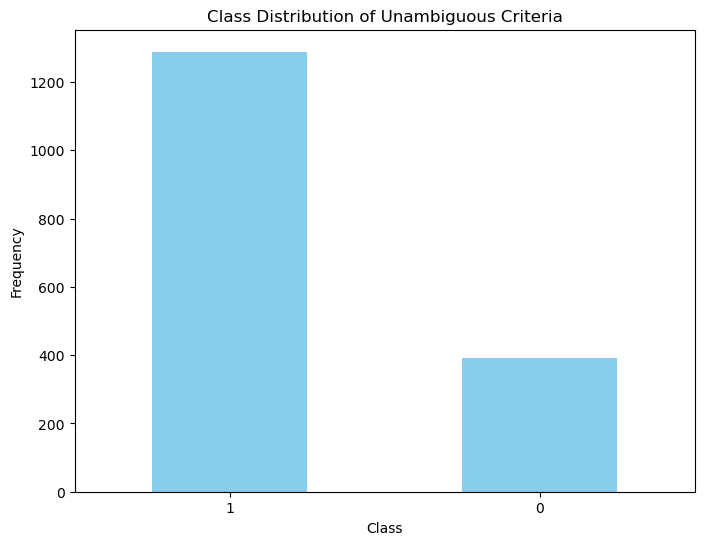

Unambiguous Criteria
1    1289
0     391
Name: count, dtype: int64


In [59]:
# Load the CSV file
df = pd.read_csv('user_stories_with_predictions.csv')

# Get the class distribution
class_distribution = df['Unambiguous Criteria'].value_counts()

# Plot the class distribution
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar', color='skyblue')
plt.title('Class Distribution of Unambiguous Criteria')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

print(df['Unambiguous Criteria'].value_counts())